## Imports

In [ ]:
!pip install ucimlrepo --quiet
!pip install sklearn --quiet

# Importing the Data

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
Y = iris.data.targets 

In [3]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
Y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


# Starting The Linear Regression


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [6]:
df_binary = X[['sepal length','sepal width']]
df_binary

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
x = np.array(df_binary['sepal length']).reshape(-1,1)
y = np.array(df_binary['sepal width']).reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25)

regr = LinearRegression()
regr.fit(X_train,Y_train)

print(regr.score(X_test,Y_test))

-0.09351153508692711


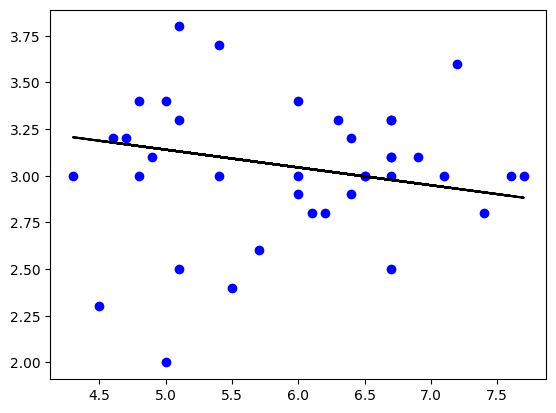

In [8]:
Y_pred = regr.predict(X_test)
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, Y_pred, color ='k')

plt.show()
# Data scatter of predicted values


# Multiple Regression

In [9]:
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
df = student_performance.data.features
z = student_performance.data.targets
df['paid']

0      no
1      no
2      no
3      no
4      no
       ..
644    no
645    no
646    no
647    no
648    no
Name: paid, Length: 649, dtype: object

In [ ]:
df_encoded =df 

df_encoded[['paid','activities','nursery','higher']] = df_encoded[['paid','activities','nursery','higher']].replace({'yes': 1, 'no': 0})

for col in df_encoded.columns:
    if isinstance(df_encoded[col][0], str):
        df_encoded.drop(columns = [col],inplace = True)

# Now drop rows with NaN values
df_encoded = df_encoded.dropna()

In [11]:
X = df_encoded#[['age','Medu','Fedu','freetime','goout','Dalc','Walc','absences','studytime']]
Y = np.array(z['G3']).reshape(-1,1)

In [12]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scale = StandardScaler()
scaled_X = scale.fit_transform(X)
scaled_Y = scale.fit_transform(Y)
regr = linear_model.LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(scaled_X,scaled_Y,test_size=0.10)

regr.fit(X_train,Y_train)
Y_predicted = regr.predict(X_test)
print(mean_squared_error(Y_test,Y_predicted))
regr.score(X_test,Y_test)

0.47580862822632913


0.08454100682004329

# Polynomial Regression

In [13]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


# Logistic Regression

In [14]:
df = pd.read_csv('Heart.csv')
df.drop(columns = 'Unnamed: 0',inplace = True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [15]:
# changing categorical data to numeric values
df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes
df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes
df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [45]:
# taking care of null values
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
X = df.drop(columns = 'AHD')
y = df['AHD']

In [18]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 21)

In [19]:
#scaling data now
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0).fit(X_train_scaled,y_train)
log_reg.predict(X_train_scaled)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0], dtype=int8)

In [21]:
print(log_reg.score(X_train_scaled,y_train))
log_reg.score(X_test_scaled,y_test)

0.8571428571428571


0.88

In [22]:
# trying to improve
log_reg1 = LogisticRegression(random_state=0, C =1, fit_intercept=True).fit(X_train_scaled,y_train)
print(log_reg1.score(X_train_scaled,y_train))
log_reg1.score(X_test_scaled,y_test)


0.8571428571428571


0.88

# Regularization

In [47]:
df = pd.read_csv('kc_house_data.csv')
df.dropna(inplace= True)
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [48]:
dropcol = ['id','date','zipcode']
df.drop(columns =['id','date','zipcode'] ,inplace =  True)

In [49]:
y = df['price']
X = df.drop(columns = 'price')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [59]:
regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_train,y_train))
regr.score(X_test,y_test)

0.6963734759267525


0.691147467913934

In [60]:
# Scaling now 
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [61]:
regr1 = LinearRegression()
regr1.fit(X_scaled_train,y_train)
print(regr1.score(X_scaled_train,y_train))
regr1.score(X_scaled_test,y_test)

0.6963734759267526


0.6911474679139227

In [76]:
# Lasso Regression
from sklearn.linear_model import Ridge, Lasso

# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

regr2 = Lasso(alpha = 2)
regr2.fit(X_scaled_train, y_train)
regr2.score(X_scaled_test,y_test)

C:\Users\dines\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+13, tolerance: 2.250e+11
  model = cd_fast.enet_coordinate_descent(


0.691149228282519